![](turev-matris.png)

In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([[1.0] ,[2.0] , [3.0]], requires_grad=True)
x

tensor([[1.],
        [2.],
        [3.]], requires_grad=True)

In [3]:
W = torch.tensor([[2.0 ,4.0 , 6.0],
                  [3.0 ,5.0 , 7.0]], requires_grad=True)

In [4]:
W

tensor([[2., 4., 6.],
        [3., 5., 7.]], requires_grad=True)

In [5]:
y = W@x
loss = y.sum()

In [6]:
y, loss

(tensor([[28.],
         [34.]], grad_fn=<MmBackward>),
 tensor(62., grad_fn=<SumBackward0>))

In [7]:
loss.backward(retain_graph=True)

In [8]:
x.grad

tensor([[ 5.],
        [ 9.],
        [13.]])

In [9]:
W.grad

tensor([[1., 2., 3.],
        [1., 2., 3.]])

In [10]:
x.grad

tensor([[ 5.],
        [ 9.],
        [13.]])

# Mult-Valued Regression 

$$
Wx^t = y^t
$$

## Start with uni-valued regression

$$
wx^t = y^t
$$

In [37]:
N = 1000
wstar = torch.tensor([1.0 ,0.0 , 2.0])
X = torch.rand(3, N)
y = wstar@X

In [38]:
w = torch.rand(1, 3, requires_grad = True)
w 

tensor([[0.7970, 0.2396, 0.9354]], requires_grad=True)

In [39]:
a = w@X
e = a - y
J = (1/(2 * N)) * e@e.T

In [40]:
J

tensor([[0.1850]], grad_fn=<MmBackward>)

In [41]:
J.backward(retain_graph=True)

In [42]:
w.grad

tensor([[-0.2903, -0.2463, -0.3477]])

$$
\frac{dJ}{dW} = \frac{dJ}{de} \frac{de}{dW} = \frac{1}{2N} 2e \times X
$$

In [45]:
(1/N) * e@X.T

tensor([[-0.2903, -0.2463, -0.3477]], grad_fn=<MmBackward>)

In [69]:
iteration, alpha = 10000, 0.1
w = torch.rand(1, 3, requires_grad = True)
Js = []
for i in range(iteration):
    a = w@X
    e = a - y
    J = (1/(2 * N)) * e@e.T
    Js.append(J.detach().numpy().flatten())
    
    J.backward(retain_graph=True)
    
    # gradient descent, don't track
    # torch.no_grad() make all the operations in the block have no gradients.
    with torch.no_grad():
        w = w - alpha *  w.grad
    w.requires_grad = True

In [70]:
w

tensor([[0.9399, 0.8840, 0.9249]], requires_grad=True)

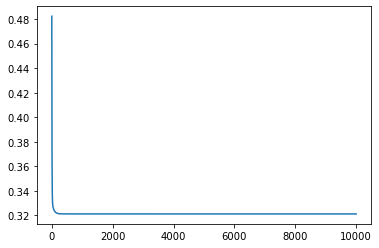

In [71]:
plt.plot(Js)

# Multi valued regression

In [72]:
N = 1000
wstar1 = torch.tensor([1.0 ,0.0 , 2.0])
wstar2 = torch.tensor([2.0 ,0.0 , 1.0])

X = torch.rand(3, N)
y1 = wstar1@X
y2 = wstar2@X

In [75]:
iteration, alpha = 10000, 0.1
w1 = torch.rand(1, 3, requires_grad = True)
w2 = torch.rand(1, 3, requires_grad = True)
Js = []
for i in range(iteration):
    a1 = w1@X
    e1 = a1 - y1
    J1 = (1/(2 * N)) * e1@e1.T
    
    a2 = w2@X
    e2 = a2 - y2
    J2 = (1/(2 * N)) * e2@e2.T
    
    Js.append(J1.detach().numpy().flatten()+J2.detach().numpy().flatten())
    
    J1.backward(retain_graph=True)
    J2.backward(retain_graph=True)
    
    # gradient descent, don't track
    # torch.no_grad() make all the operations in the block have no gradients.
    with torch.no_grad():
        w1 = w1 - alpha *  w1.grad
        w2 = w2 - alpha *  w2.grad
    w1.requires_grad = True
    w2.requires_grad = True

In [76]:
w1

tensor([[1.0000e+00, 3.1625e-06, 2.0000e+00]], requires_grad=True)

In [77]:
w2

tensor([[2.0000e+00, 1.1292e-06, 1.0000e+00]], requires_grad=True)

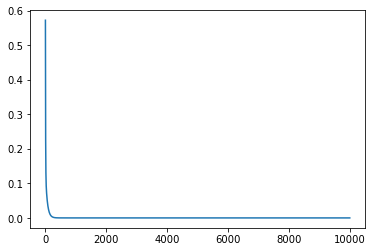

In [78]:
plt.plot(Js)

# MVR

In [79]:
N = 1000
Wstar = torch.tensor([[1.0 ,0.0 , 2.0],
                       [2.0 ,0.0 , 1.0]])

X = torch.rand(3, N)
y = Wstar@X

In [81]:
iteration, alpha = 10000, 0.1
w = torch.rand(2, 3, requires_grad = True)
Js = []
for i in range(iteration):
    a = w@X
    e = a - y
    J = (1/(2 * N)) * torch.sum(e**2)
    Js.append(J.detach().numpy().flatten())
    
    J.backward(retain_graph=True)
    
    # gradient descent, don't track
    # torch.no_grad() make all the operations in the block have no gradients.
    with torch.no_grad():
        w = w - alpha *  w.grad
    w.requires_grad = True

In [82]:
w

tensor([[1.0000e+00, 3.5718e-06, 2.0000e+00],
        [2.0000e+00, 3.6374e-06, 1.0000e+00]], requires_grad=True)

In [89]:
import torch.optim as optim

w = torch.rand(2, 3, requires_grad = True)
alpha = 0.1

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([w], lr=alpha)

for i in range(3000):
    # forward: use new weight to calculate y
    a = w@X
    e = a - y
    J = (1/(2 * N)) * torch.sum(e**2)

    # backward: calculate derivative dy/dw
    J.backward()
    # No more manual update!
    optimizer.step()
    # Do not accumulate gradients
    optimizer.zero_grad()
w

tensor([[1.0000e+00, 3.5718e-06, 2.0000e+00],
        [2.0000e+00, 3.6374e-06, 1.0000e+00]], requires_grad=True)